## Pd3 Jamroży Bartosz

In [17]:
library(tidyverse)
library(reshape2)


library(DALEX)
library(DALEXtra)
library(randomForest)
library(xgboost)
library(mlr)


options(warn=-1)

Loading required package: ParamHelpers
Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.


Dane z: https://www.kaggle.com/camnugent/california-housing-prices

In [4]:
housing <- read.csv("housing.csv")

## Model
przykładowy model z : https://www.kaggle.com/camnugent/introduction-to-machine-learning-in-r-tutorial

In [5]:
housing$total_bedrooms[is.na(housing$total_bedrooms)] =median(housing$total_bedrooms , na.rm = TRUE)
housing$mean_bedrooms = housing$total_bedrooms/housing$households
housing$mean_rooms = housing$total_rooms/housing$households
drops = c('total_bedrooms', 'total_rooms')
housing = housing[ , !(names(housing) %in% drops)]


set.seed(1738) # Set a random seed so that same sample can be reproduced in␣future runs
sample = sample.int(n = nrow(housing), size = floor(.8*nrow(housing)), replace= F)
train = housing[sample, ] #just the samples
test = housing[-sample, ] #everything but the samples

train_y = train[,'median_house_value']
train_x = train[, names(train) !='median_house_value']


rf_model = randomForest(train_x, y = train_y , ntree = 500, importance = TRUE)


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [11]:
library(tidyverse)
library(reshape2)

housing = read.csv("housing.csv")

# clean data
housing$total_bedrooms[is.na(housing$total_bedrooms)] = median(housing$total_bedrooms , na.rm = TRUE)

#Fix the total columns - make them means
housing$mean_bedrooms = housing$total_bedrooms/housing$households
housing$mean_rooms = housing$total_rooms/housing$households

drops = c('total_bedrooms', 'total_rooms')
housing = housing[ , !(names(housing) %in% drops)]

#Turn categoricals into booleans
categories = unique(housing$ocean_proximity)

#split the categories off
cat_housing = data.frame(ocean_proximity = housing$ocean_proximity)

for(cat in categories){
  cat_housing[,cat] = rep(0, times= nrow(cat_housing))
}


for(i in 1:length(cat_housing$ocean_proximity)){
  cat = as.character(cat_housing$ocean_proximity[i])
  cat_housing[,cat][i] = 1
}

cat_columns = names(cat_housing)
keep_columns = cat_columns[cat_columns != 'ocean_proximity']
cat_housing = select(cat_housing,one_of(keep_columns))

#Scale the numerical variables

drops = c('ocean_proximity','median_house_value')
housing_num =  housing[ , !(names(housing) %in% drops)]

scaled_housing_num = scale(housing_num)

#Merge the altered numerical and categorical dataframes
cleaned_housing = cbind(cat_housing, scaled_housing_num, median_house_value=housing$median_house_value)


# Create a test set of data

set.seed(1738) # Set a random seed so that same sample can be reproduced in future runs

sample = sample.int(n = nrow(cleaned_housing), size = floor(.8*nrow(cleaned_housing)), replace = F)
train = cleaned_housing[sample, ] #just the samples
test  = cleaned_housing[-sample, ] #everything but the samples

#Random forest model
library('randomForest')

set.seed(1738)

train_y = train[,'median_house_value']
train_x = train[, names(train) !='median_house_value']

rf_model = randomForest(train_x, y = train_y , ntree = 500, importance = TRUE)

### Tworzenie explainera

In [12]:
# explainer <- DALEX::explain(model = rf_model,
#                             data = housing[, -7],
#                             y = housing[, 7])
rf_model_expain <- DALEX::explain(model = rf_model, data=train_x, y=train_y)

Preparation of a new explainer is initiated
  -> model label       :  randomForest  (  default  )
  -> data              :  16512  rows  13  cols 
  -> target variable   :  16512  values 
  -> predict function  :  yhat.randomForest  will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package randomForest , ver. 4.6.14 , task regression (  default  ) 
  -> predicted values  :  numerical, min =  39702.65 , mean =  206688.3 , max =  499518.2  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -126586.5 , mean =  -173.9163 , max =  195986.5  
  A new explainer has been created!  


In [13]:
# fi_1 <- model_parts(explainer, B = 10)
fi_1 <- model_parts(rf_model_expain, B = 10)

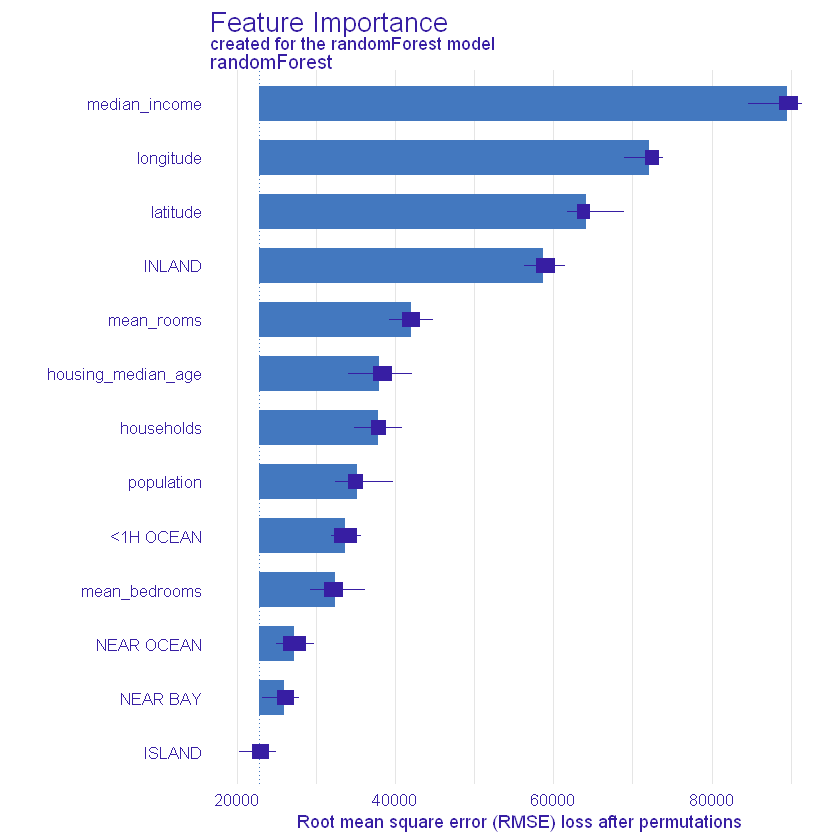

In [14]:
plot(fi_1)

In [34]:
model_xg <- xgboost(data = as.matrix(train_x), label = train_y,nrounds=50,objective = 'reg:squarederror')

[1]	train-rmse:172392.031250 
[2]	train-rmse:128907.367188 
[3]	train-rmse:100362.273438 
[4]	train-rmse:81895.804688 
[5]	train-rmse:70312.023438 
[6]	train-rmse:63434.140625 
[7]	train-rmse:59098.710938 
[8]	train-rmse:55772.839844 
[9]	train-rmse:53998.953125 
[10]	train-rmse:52433.031250 
[11]	train-rmse:51059.761719 
[12]	train-rmse:49817.902344 
[13]	train-rmse:48931.281250 
[14]	train-rmse:47667.933594 
[15]	train-rmse:46871.847656 
[16]	train-rmse:46173.339844 
[17]	train-rmse:45658.121094 
[18]	train-rmse:45126.437500 
[19]	train-rmse:44662.339844 
[20]	train-rmse:44306.175781 
[21]	train-rmse:43601.914062 
[22]	train-rmse:43197.570312 
[23]	train-rmse:42828.015625 
[24]	train-rmse:42466.546875 
[25]	train-rmse:42043.429688 
[26]	train-rmse:41560.718750 
[27]	train-rmse:41401.851562 
[28]	train-rmse:40774.703125 
[29]	train-rmse:40400.667969 
[30]	train-rmse:40053.917969 
[31]	train-rmse:39827.046875 
[32]	train-rmse:39503.601562 
[33]	train-rmse:39409.128906 
[34]	train-rmse:

In [36]:
explainer_ranger <- DALEX::explain(model = model_xg,
                     data = as.matrix(train_x),
                     y = train_y)

Preparation of a new explainer is initiated
  -> model label       :  xgb.Booster  (  default  )
  -> data              :  16512  rows  13  cols 
  -> target variable   :  16512  values 
  -> predict function  :  yhat.xgb.Booster  will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package xgboost , ver. 1.4.1.1 , task regression (  default  ) 
  -> predicted values  :  numerical, min =  31917.83 , mean =  206495.6 , max =  567514.1  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -200900.9 , mean =  18.7722 , max =  253818.7  
  A new explainer has been created!  


In [37]:
fi_2 <- model_parts(explainer_ranger, B = 10)

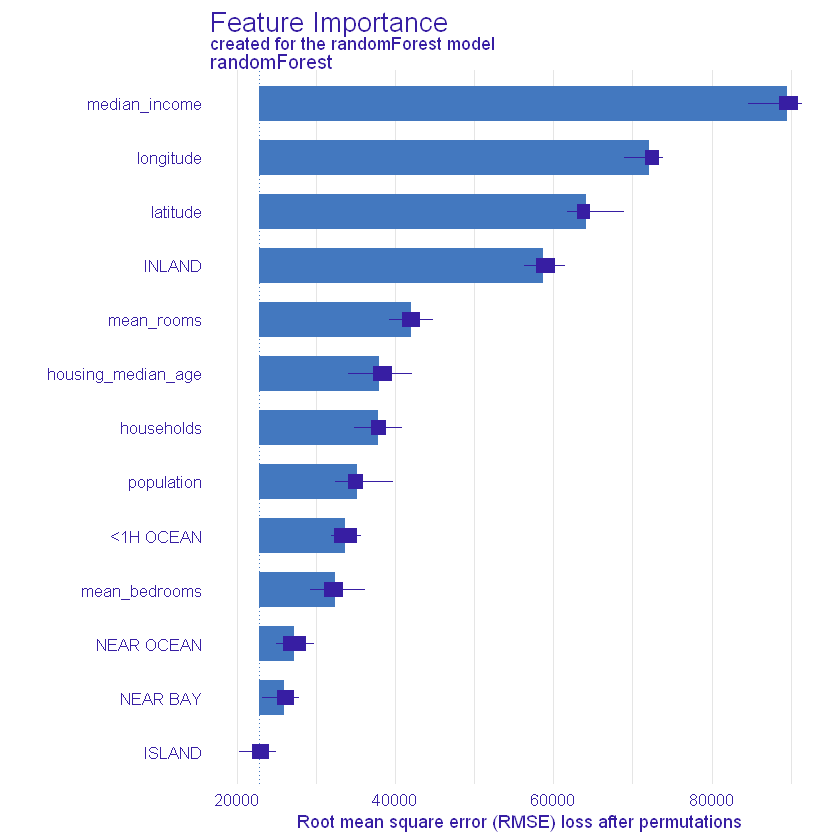

In [40]:
plot(fi_1)

Wnioski Las Losowy:

Dla Lasu losowego najważniejszą zmienną dla predykcji to mediana dochodu (tzn gdybyśmy nie mieli tej danej model radziłby sobie dużo gorzej). Inne ważne kategorie niosące duży zasób informacji to dane o położeniu geograficznym, oraz kategoria określająca czy dana nieruchomość leży w głębi lądu) 


Wioski te raczej pokr
ywają się z wyjaśnieniami lokalnymi gdzie różniej największy wpływ na predykcje miały dochód i położenie geograficzne. (można by tu po wtóre powtarzać wnioski z poprzednich prac domowych jak to wysokość dochodu składnia do wynajmowania/kupowania droższych mieszkań 

                                                                                                                        
W zbiorze występuje jedna kolumna „Island” której usuniecie nie pogarsza wyniku modelu. To znaczy nie niesie informacji potrzebnych modelowi.
Z EDA wiadomo ze jest to zmienna określająca czy dom leży na wyspie, jednak takich nieruchomości w całym zbiorze jest tylko 10, stąd tez patrząc globalnie, ta informacją nic nam nie daje 



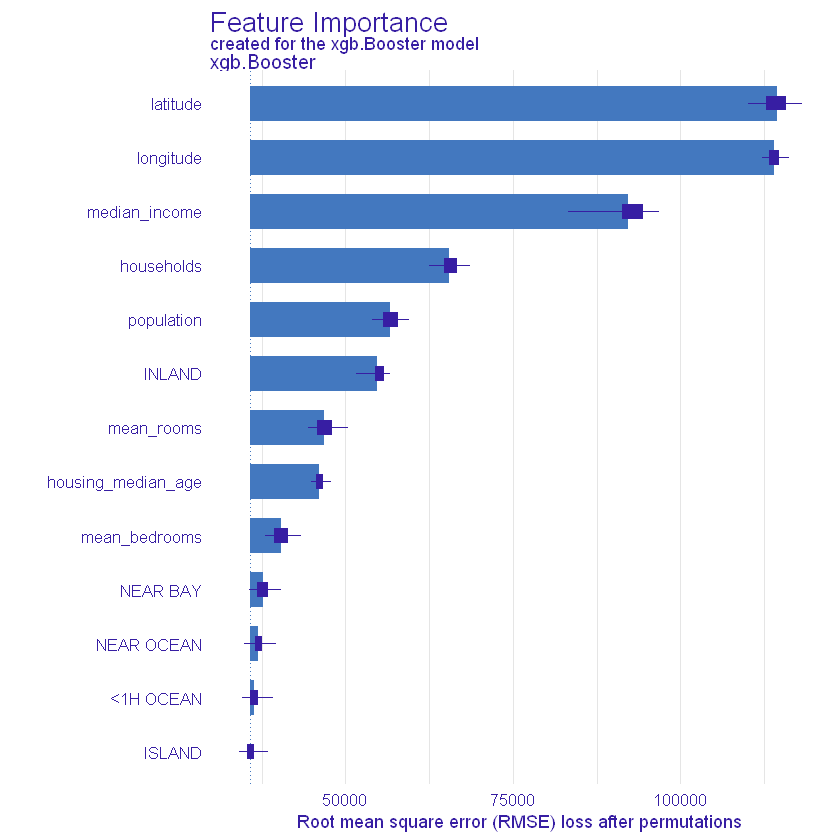

In [38]:
plot(fi_2)

Wnioski XGboost:


Model głównie opiera się na tych samych kolumnach co Las losowy. Różnice widać w przypadku zmiennych mało znaczących tutaj jest ich aż cztery.  Zważając na to iż XGboost osiągnął gorszy wynik niż raz losowy może oznaczać to ze nie nauczył wyciągać się w wystarczających wniosków z tych ze czterech kategorii 


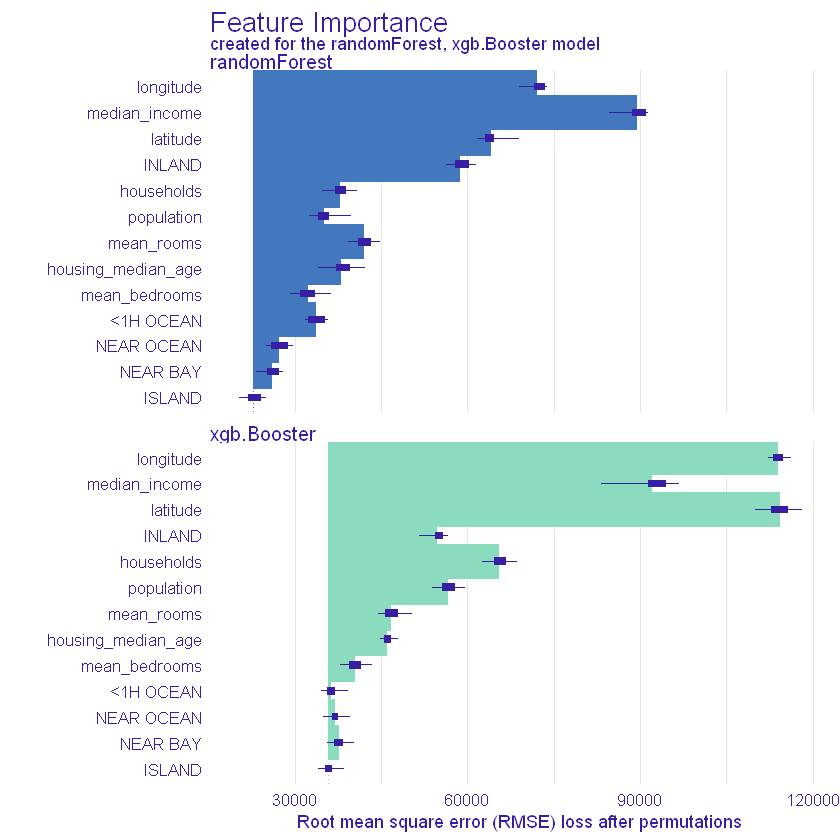

In [39]:
plot(fi_1,fi_2)

Podsumowanie:

Najważniejsze zmiennie raczej będą takie dane dla różnych modeli, jednak będą występowały różnice w tym jak bardzo są ważne. Spore różnicę mogą występować dla kategorii niosących mniej informacji, lub takich z których ciężko jest się modelowi tą informacje wyłuskać 
